In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom
from scipy.stats import norm, gamma, nbinom
from scipy.optimize import curve_fit
from tqdm import tqdm
from matplotlib.colors import ListedColormap
import pandas as pd

Notice the difference between Negative Binomial $NB$ betweem *numpy* and *theoretical RSA*:

$$
P_{numpy}(N;\tilde{n};p) = \binom{N+\tilde{n}-1}{N} p^\tilde{n} (1-p)^N 
\quad
,
\quad
P_{RSA}(n|r,\xi) = \binom{n+r-1}{n} \xi^n (1-\xi)^r 
$$

Change rule:
$$
N \rightarrow n
\quad
,
\quad
\tilde{n} \rightarrow r
\quad
,
\quad
p \rightarrow 1 - \xi
$$

In [13]:
from functions import *

### In-silico forests

In [14]:
model = 'NB'
#model = 'LN'
metropolis_ = False
load_file_ = True

if model == 'NB':
    r, g = 0.8, 0.999
    S_nb = 4974
    size_S = S_nb
    params_model = [r,g,size_S]

    if metropolis_:
        param_metropolis = [150, int(5e6), int(1e5), 10]
    else:
        param_metropolis = None
    
if model == 'LN':
    mu, sigma = 5, 1
    S_ln = 5000
    size_S = S_ln
    params_model = [mu,sigma,size_S]

    if metropolis_:
        param_metropolis = [150, int(5e6), int(1e5), 10]
    else:
        param_metropolis = None


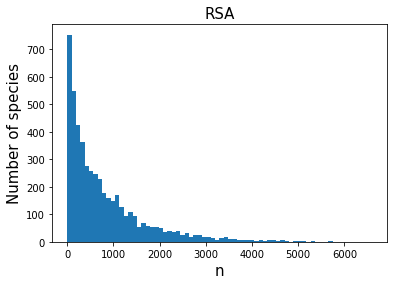

In [15]:
abundances, counts, bins = generate_abundances(model, metropolis_ = metropolis_, load_file = load_file_, parameters = params_model, plot_hist = True, parameters_metropolis = param_metropolis)

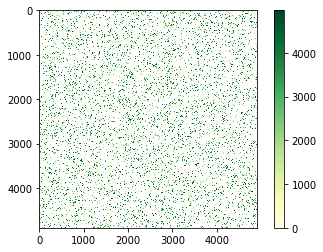

In [16]:
side_matrix = 4900
num_cell = int(4900**2/98**2)
p = 0.05
random_placement = True
try_use_more_indiv = False
plot_matrix = True
params = [size_S, side_matrix, num_cell, p, random_placement, try_use_more_indiv, plot_matrix]


M, M_matrix = create_M_matrix_in_silico(abundances, *params)
M_S_matrix, sampled_matrix_species_info, sampled_matrix = create_MxS_matrix_and_sampling(M_matrix, num_cell, size_S, p)

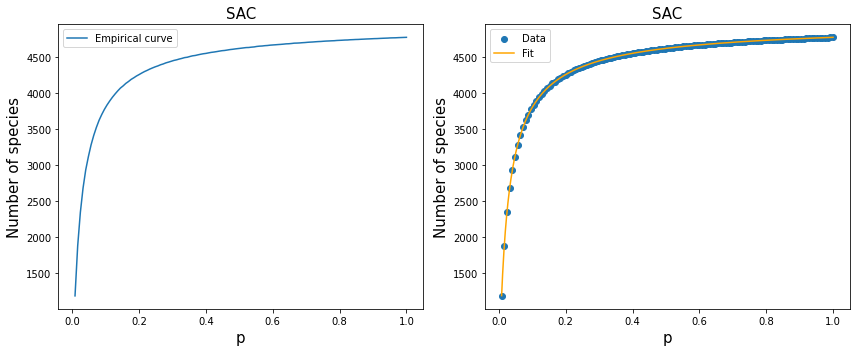

In [17]:
if model == 'NB':
    r_init, xi_init = 0.2, 0.999
    param_init_ = [r_init, xi_init]
    
if model == 'LN':
    mu_init, sigma_init = 4, 0.8
    param_init_ = [mu_init, sigma_init]

sub_sample_area, sac, S_star, param_fitted, cov_fitted, errors, rel_err_array = compute_fit_SAC(sampled_matrix, *param_init_, plot = True)

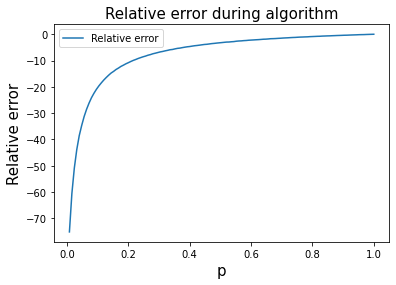

In [18]:
plot_err_array(sub_sample_area, rel_err_array)

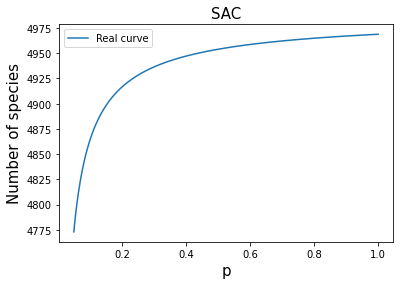

In [19]:
r_real, xi_real, S_real, err_S_real, rel_err, err_rel_err = compute_real_parameters(param_fitted[0], param_fitted[1], errors, p, S_star, size_S, plot_real = True)

In [20]:
n_sim = 10
silico_data = True
parameters = [silico_data, model,M_S_matrix, size_S, p, n_sim]

S_real_mean, err_S_real_mean, rel_error_mean, rel_error_error_mean, r_mean, err_r_mean, xi_mean, err_xi_mean = compute_relative_error_n_simulations(*parameters)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:52<00:00, 11.23s/it]


In [21]:
print('1 simulation: ', S_real, err_S_real)
print('10 simulations: ', S_real_mean, err_S_real_mean)

1 simulation:  4968.794059510489 0.5352685024587512
10 simulations:  4960.512343519102 0.20479559196600494


In [22]:
print('1 simulation: ', rel_err, err_rel_err)
print('10 simulations: ', rel_error_mean, rel_error_error_mean)

1 simulation:  -0.10466305769020495 0.010761328959765807
10 simulations:  -0.27116317814431634 0.013353200116596563


In [23]:
print('10 simulations: ', r_mean, err_r_mean)
print('10 simulations: ', xi_mean, err_xi_mean)

10 simulations:  0.8110159163736052 0.010717019415061941
10 simulations:  0.9989926919272392 0.0021614005211792317


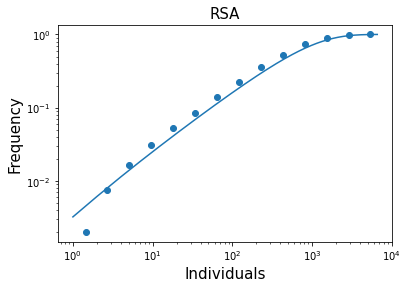

In [24]:
compute_RSA(M_matrix, r_real, xi_real)

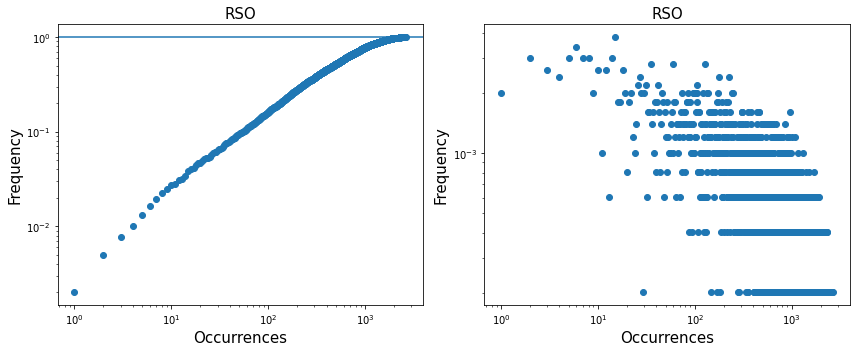

In [25]:
occurrences, counts = RSO_distribution_count_occupied_plot(M_matrix, 3000, size_S, 0.05)

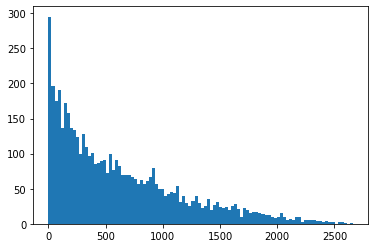

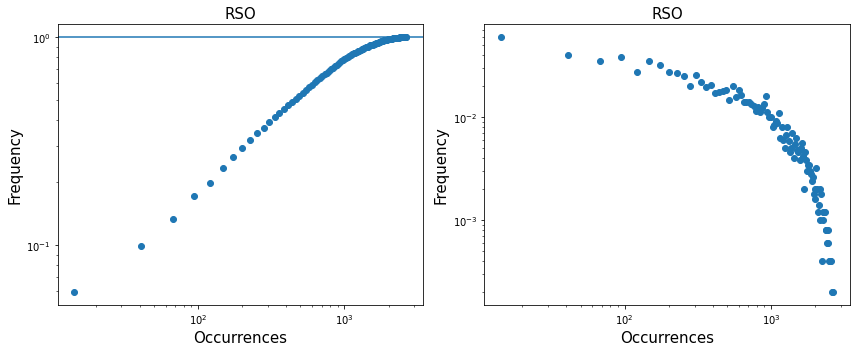

In [26]:
occurrences, counts = RSO_distribution(M_matrix, 3000, size_S, p, 100, True)

### Dataset BCI

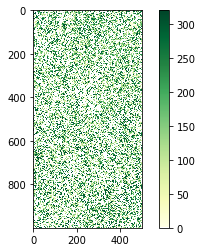

In [27]:
file_name = 'bci05.csv'
check_only_alive = False
M_matrix, size_S = create_M_matrix_from_database_BCI(file_name, check_only_alive, plot)

In [28]:
num_cells = 800
p = 0.1
M_S_matrix, sampled_matrix_species_info, sampled_matrix = create_MxS_matrix_and_sampling(M_matrix, num_cells, size_S, p)

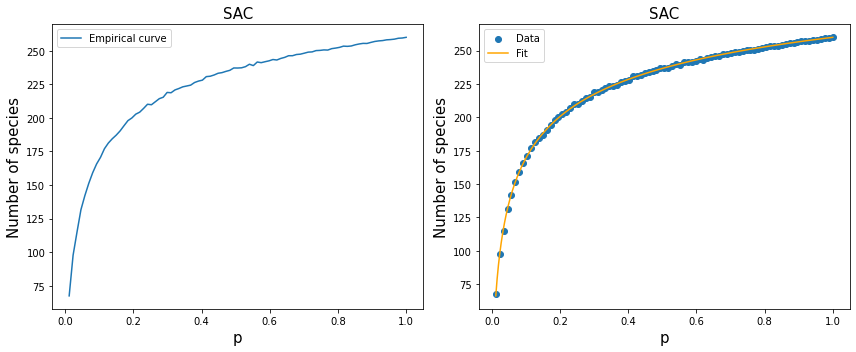

In [29]:
r_init, xi_init = 0.2, 0.999
param_init_ = [r_init, xi_init]

sub_sample_area, sac, S_star, param_fitted, cov_fitted, errors, rel_err_array = compute_fit_SAC(sampled_matrix, *param_init_, plot = True)

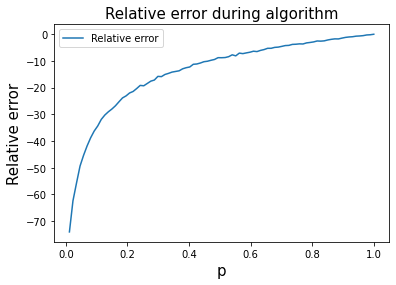

In [30]:
plot_err_array(sub_sample_area, rel_err_array)

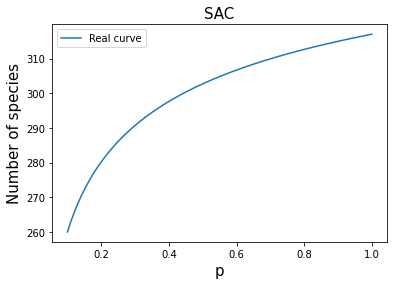

In [31]:
r_real, xi_real, S_real, err_S_real, rel_err, err_rel_err = compute_real_parameters(param_fitted[0], param_fitted[1], errors, p, S_star, size_S, plot_real = True)

In [32]:
n_sim = 100
silico_data, model = False, 'NB'
parameters = [silico_data, model, M_S_matrix, size_S, p, n_sim]

S_real_mean, err_S_real_mean, rel_error_mean, rel_error_error_mean, r_mean, err_r_mean, xi_mean, err_xi_mean = compute_relative_error_n_simulations(*parameters)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:31<00:00,  3.16it/s]


In [33]:
print('1 simulation: ', S_real, err_S_real)
print('10 simulations: ', S_real_mean, err_S_real_mean)

1 simulation:  316.9941447152613 1.7663777600513615
10 simulations:  310.4178054875583 0.17454332875824302


In [34]:
print('1 simulation: ', rel_err, err_rel_err)
print('10 simulations: ', rel_error_mean, rel_error_error_mean)

1 simulation:  -0.9393297764808396 0.5519930500160505
10 simulations:  -2.994435785138023 0.4135584480459025


In [35]:
print('10 simulations: ', r_mean, err_r_mean)
print('10 simulations: ', xi_mean, err_xi_mean)

10 simulations:  0.26262677610078033 0.006773686893550393
10 simulations:  0.998988235555649 0.0014981385817054039


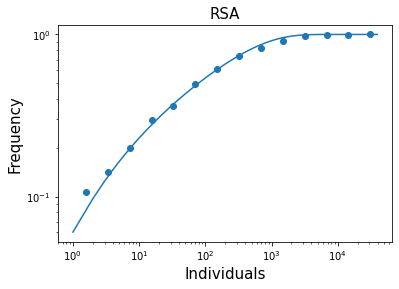

In [36]:
compute_RSA(M_matrix, r_real, xi_real)

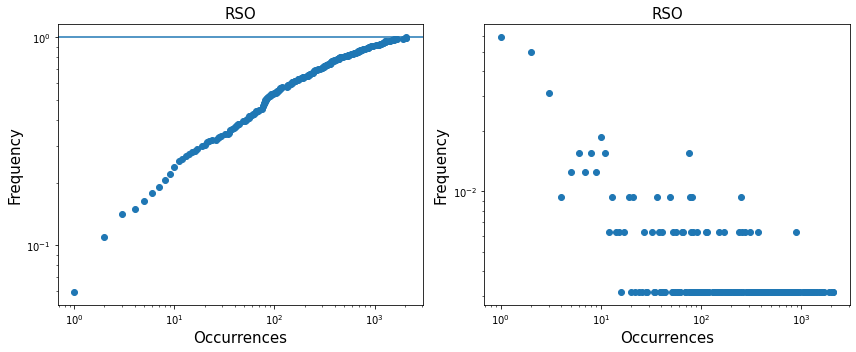

In [37]:
occurrences, counts = RSO_distribution_count_occupied_plot(M_matrix, 2000, size_S, p)

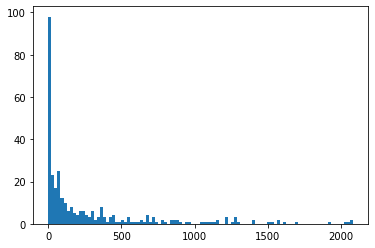

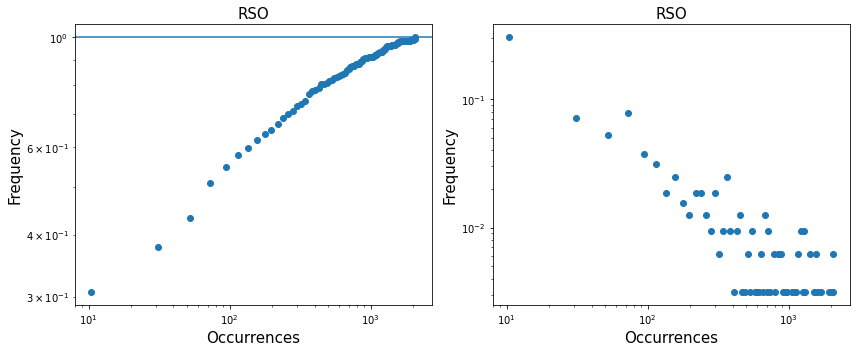

In [38]:
occurrences, counts = RSO_distribution(M_matrix, 2000, size_S, p, 100, True)

##### Scaling to whole forest

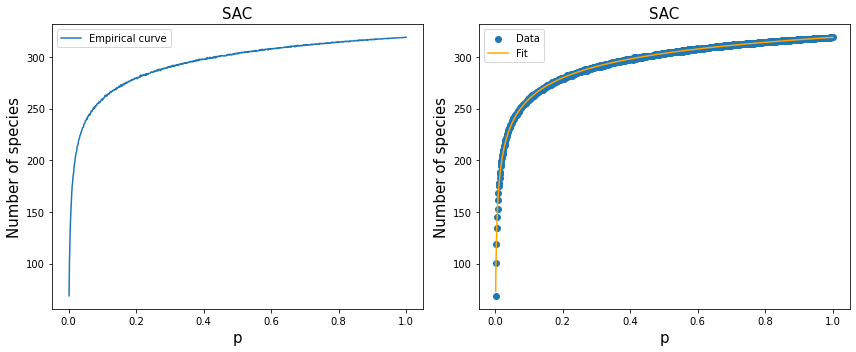

In [39]:
p = 0.032
M_S_matrix_ = np.copy(M_S_matrix)
M_S_matrix_[M_S_matrix_ != 0] = 1

r_init, xi_init = 0.2, 0.999
param_init_ = [r_init, xi_init]

sub_sample_area, sac, S_star, param_fitted, cov_fitted, errors, rel_err_array = compute_fit_SAC(M_S_matrix_, *param_init_, plot = True)  #now the sampled matrix is M_S_matrix

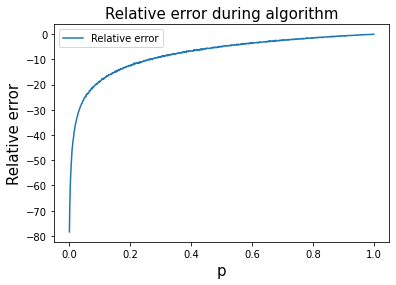

In [40]:
plot_err_array(sub_sample_area, rel_err_array)

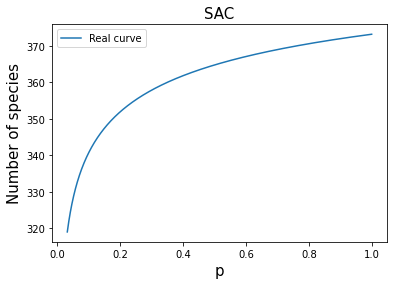

In [41]:
r_real, xi_real, S_real, err_S_real, rel_err, err_rel_err = compute_real_parameters(param_fitted[0], param_fitted[1], errors, p, S_star, size_S, plot_real = True)

In [42]:
n_sim = 10
silico_data, model = False, 'NB'
whole_forest = True
parameters = [silico_data, model, M_S_matrix, size_S, p, n_sim, whole_forest]

S_real_mean, err_S_real_mean, rel_error_mean, rel_error_error_mean, r_mean, err_r_mean, xi_mean, err_xi_mean = compute_relative_error_n_simulations(*parameters)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [05:12<00:00, 31.23s/it]


In [43]:
print('1 simulation: ', S_real, err_S_real)
print('10 simulations: ', S_real_mean, err_S_real_mean)

1 simulation:  373.16935987884324 1.4440298777299472
10 simulations:  372.9074364553504 0.4876465832146069


In [44]:
print('1 simulation: ', rel_err, err_rel_err)
print('10 simulations: ', rel_error_mean, rel_error_error_mean)

1 simulation:  16.615424962138512 0.4512593367906085
10 simulations:  16.533573892297007 0.47094570079164855


In [45]:
print('10 simulations: ', r_mean, err_r_mean)
print('10 simulations: ', xi_mean, err_xi_mean)

10 simulations:  0.1788837389891224 0.00880107240120042
10 simulations:  0.999979307519169 0.0007799181408237169


# Dataset Birds

100%|██████████████████████████████████████████████████████████████████████| 1781935/1781935 [04:09<00:00, 7144.69it/s]


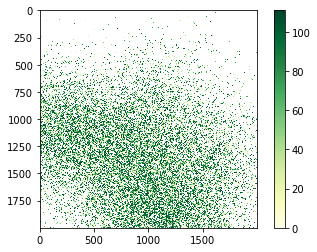

In [94]:
file_name = 'STOC_abundance_bird_data.xlsx'
side_matrix = 2000
random_placement = False
M_matrix, abundances, size_S, indiv_per_species, site_per_species, cluster_centers, df = create_M_matrix_from_database_BIRDS(file_name, side_matrix, random_placement)

In [95]:
num_cells = 1600
p = 0.025
M_S_matrix, sampled_matrix_species_info, sampled_matrix = create_MxS_matrix_and_sampling(M_matrix, num_cells, size_S, p)

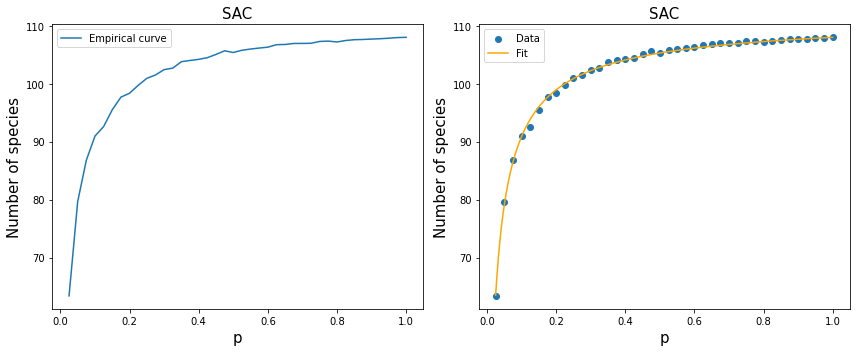

In [96]:
r_init, xi_init = 0.2, 0.999
param_init_ = [r_init, xi_init]

sub_sample_area, sac, S_star, param_fitted, cov_fitted, errors, rel_err_array = compute_fit_SAC(sampled_matrix, *param_init_, plot = True)

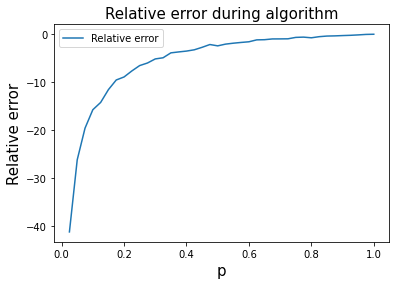

In [97]:
plot_err_array(sub_sample_area, rel_err_array)

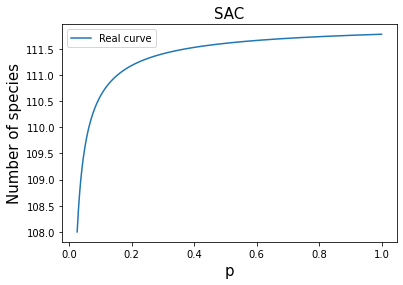

In [98]:
r_real, xi_real, S_real, err_S_real, rel_err, err_rel_err = compute_real_parameters(param_fitted[0], param_fitted[1], errors, p, S_star, size_S, plot_real = True)

In [99]:
n_sim = 100
silico_data, model = False, 'NB'
parameters = [silico_data, model, M_S_matrix, size_S, p, n_sim]

S_real_mean, err_S_real_mean, rel_error_mean, rel_error_error_mean, r_mean, err_r_mean, xi_mean, err_xi_mean = compute_relative_error_n_simulations(*parameters)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.45it/s]


In [100]:
print('1 simulation: ', S_real, err_S_real)
print('10 simulations: ', S_real_mean, err_S_real_mean)

1 simulation:  111.77898934357809 0.26551829161303847
10 simulations:  109.64619841170607 0.020539496860994214


In [101]:
print('1 simulation: ', rel_err, err_rel_err)
print('10 simulations: ', rel_error_mean, rel_error_error_mean)

1 simulation:  0.7017922014217024 0.23920566811985447
10 simulations:  -1.219641070535075 0.10737595145184561


In [102]:
print('10 simulations: ', r_mean, err_r_mean)
print('10 simulations: ', xi_mean, err_xi_mean)

10 simulations:  1.0073714820077502 0.016374516078418066
10 simulations:  0.9994965634912699 0.003003887746164789


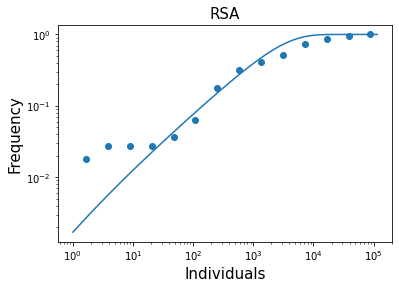

In [103]:
compute_RSA(M_matrix, r_real, xi_real)

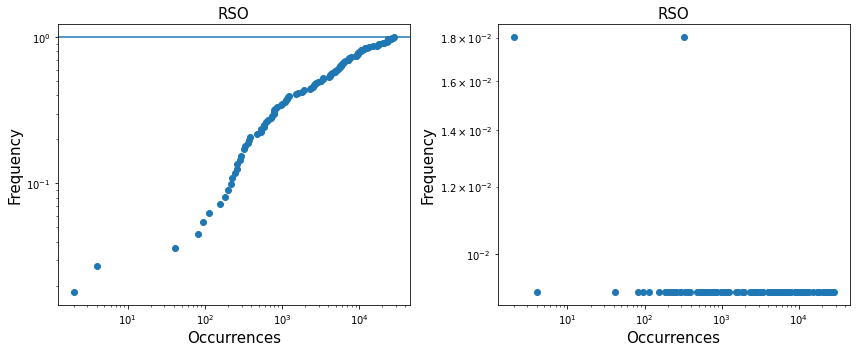

In [104]:
occurrences, counts = RSO_distribution_count_occupied_plot(M_matrix, 40000, size_S, p)

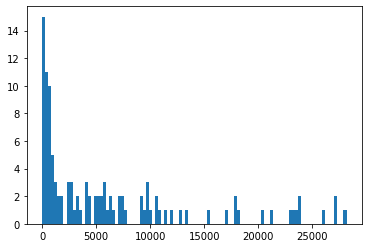

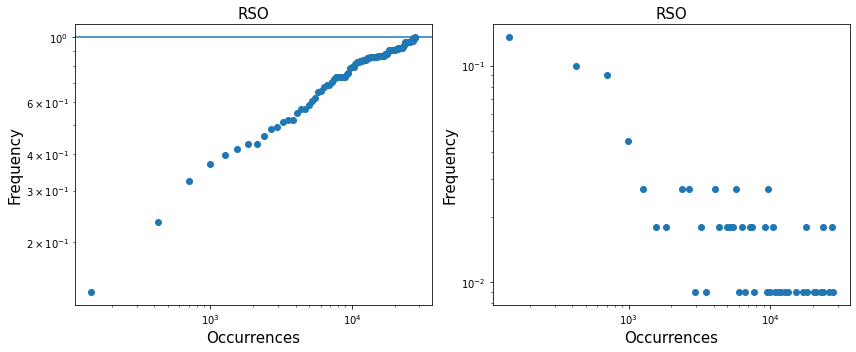

In [105]:
occurrences, counts = RSO_distribution(M_matrix, 40000, size_S, p, 100, True)

##### Scaling to whole area - assume the sample is a 5% of the whole area

In [ ]:
p = 0.05
M_S_matrix_ = np.copy(M_S_matrix)
M_S_matrix_[M_S_matrix_ != 0] = 1

r_init, xi_init = 0.2, 0.999
param_init_ = [r_init, xi_init]

sub_sample_area, sac, S_star, param_fitted, cov_fitted, errors, rel_err_array = compute_fit_SAC(M_S_matrix_, *param_init_, plot = True)  #now the sampled matrix is M_S_matrix

In [ ]:
plot_err_array(sub_sample_area, rel_err_array)

In [ ]:
r_real, xi_real, S_real, err_S_real, rel_err, err_rel_err = compute_real_parameters(param_fitted[0], param_fitted[1], errors, p, S_star, size_S, plot_real = True)

In [ ]:
n_sim = 10
silico_data, model = False, 'NB'
whole_forest = True
parameters = [silico_data, model, M_S_matrix, size_S, p, n_sim, whole_forest]

S_real_mean, err_S_real_mean, rel_error_mean, rel_error_error_mean = compute_relative_error_n_simulations(*parameters)

In [ ]:
print('1 simulation: ', S_real, err_S_real)
print('10 simulations: ', S_real_mean, err_S_real_mean)